In [1]:
# Local imports
import argparse
import os
import sys
import time
import glob
import re

# Third party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Import cdo
from cdo import *
cdo = Cdo()

# Local imports
sys.path.append('/home/users/benhutch/skill-maps-differences')
import dictionaries as dic
import functions as fnc
import plotting_functions as plt_fnc

In [2]:
# Set up the parameters for the run
variable = 'psl'
region = 'global'
region_grid = dic.gridspec_global
season = 'DJFM'
forecast_range = '2-9'
observations_path = dic.obs
obs_var_name = 'psl'
start_year = 1960
end_year = 2014
# Set up the models to use for the historical run (uninitialized)
# exclude EC-Earth3 as time period not long enough
historical_models = dic.psl_models
# Set up the models to use for the dcpp run (initialized)
dcpp_models = dic.models

In [3]:
# Now process the observations for this run
# for year 2-9 DJFM global
obs = fnc.process_observations(variable, region, region_grid,
                                forecast_range, season, observations_path,
                                    obs_var_name)

File already exists
Loading ERA5 data
Forecast range: 2 - 9
Rolling mean range: 8


In [4]:
# Load the historical data
historical_data = fnc.load_processed_historical_data(dic.base_dir_historical,
                                                        historical_models, variable,
                                                            region, forecast_range,
                                                                season)

# Extract the variable_data from the historical_data
historical_data, historical_time = fnc.extract_historical_data(historical_data, variable)

processing model:  BCC-CSM2-MR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
loading variant_label:  r2i1p1f1
loading variant_label:  r3i1p1f1
processing model:  MPI-ESM1-2-HR
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/MPI-ESM1-2-HR/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r1i1p1f1
processing model:  CanESM5
files_path:  /home/users/benhutch/skill-maps-processed-data/historical/psl/CanESM5/global/years_2-9/DJFM/outputs/processed/*.nc
loading variant_label:  r10i1p1f1
loading variant_label:  r10i1p2f1
loading variant_label:  r11i1p1f1
loading variant_label:  r12i1p1f1
loading variant_label:  r13i1p1f1
loading variant_label:  r14i1p1f1
loading variant_label:  r15i1p1f1
loading variant_label:  r16i1p1f1
loading variant_label:  r17i1p1f1
loading variant_label:  r18i1p1f1
loading variant_label:  r19i1p1f1
loading v

In [5]:
# Load the dcpp data
dcpp_data = fnc.load_data(dic.dcpp_base_dir, dcpp_models, 
                            variable, region, forecast_range, 
                                season)

# Extract the variable_data from the dcpp_data
# using the function process_data
dcpp_data, dcpp_time = fnc.process_data(dcpp_data, variable)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r3i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r4i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/global/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_global_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/

In [6]:
type(historical_data)

dict

In [7]:
type(dcpp_data)

dict

In [8]:
# # TODO: test the p-value bootstrapping function
# # only do 50 bootstraps for our testcase
# pfield_bs = fnc.calculate_spatial_correlations_bootstrap(obs, dcpp_data, dcpp_models, variable='psl', n_bootstraps=50)

In [9]:
# type(pfield_bs)


# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs)
# below_threshold = np.count_nonzero(pfield_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [10]:
# import numpy as np

# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs)
# below_threshold = np.count_nonzero(pfield_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

In [11]:
# # Now test this for the historical data
# # only do 50 bootstraps for our testcase
# pfield_bs_hist = fnc.calculate_spatial_correlations_bootstrap(obs, historical_data, historical_models, variable='psl', n_bootstraps=50)

In [12]:
# # Count how many values are less than 0.05
# total_values = np.size(pfield_bs_hist)
# below_threshold = np.count_nonzero(pfield_bs_hist < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [13]:
# # test the function for calculated the bootstrapped p-values
# # for the differences between the historical and dcpp data
# # only do 50 bootstraps for our testcase
# pfield_diff_bs = fnc.calculate_spatial_correlations_bootstrap_diff(obs, dcpp_data, historical_data, 
#                                                                     dcpp_models, historical_models, 
#                                                                         variable='psl', n_bootstraps=50)

In [14]:
# # Count how many values are less than 0.05
# total_values = np.size(pfield_diff_bs)
# below_threshold = np.count_nonzero(pfield_diff_bs < 0.05)

# # Calculate the percentage
# percentage = below_threshold / total_values * 100

# # Print the percentage
# print(percentage)

# print(total_values)
# print(below_threshold)

In [15]:
# # Now calculate the spatial correlations differences
# # between the dcpp and historical data
# # using the function calculate_spatial_correlations_diff
# # NOTE: watch out for dodgy output from this function
# rfield_diff, sign_regions, obs_lons_converted, lons_converted, observed_data, \
#     dcpp_ensemble_mean, historical_ensemble_mean, dcpp_ensemble_members_count, \
#         historical_ensemble_members_count = fnc.calculate_spatial_correlations_diff(obs, dcpp_data, historical_data,
#                                                                                         dcpp_models, historical_models,
#                                                                                             variable)

observed data type <class 'xarray.core.dataarray.DataArray'>
model data type <class 'dict'>
observed data shape (65, 72, 144)
model data shape 12
1959
1960
1961
1962
2020
2021
2022
2023
extracting data for model: BCC-CSM2-MR
extracting data for model: MPI-ESM1-2-HR
extracting data for model: CanESM5
extracting data for model: CMCC-CM2-SR5
extracting data for model: HadGEM3-GC31-MM
extracting data for model: EC-Earth3
extracting data for model: MPI-ESM1-2-LR
extracting data for model: FGOALS-f3-L
extracting data for model: MIROC6
extracting data for model: IPSL-CM6A-LR
extracting data for model: CESM1-1-CAM5-CMIP5
extracting data for model: NorCPM1
converting observed data to numpy array
shape of ensemble members (178, 54, 72, 144)
shape of observed data (54, 72, 144)
observed data type <class 'numpy.ndarray'>
model data type <class 'numpy.ndarray'>
observed data shape (54, 72, 144)
model data shape (178, 54, 72, 144)
observed years [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 197

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


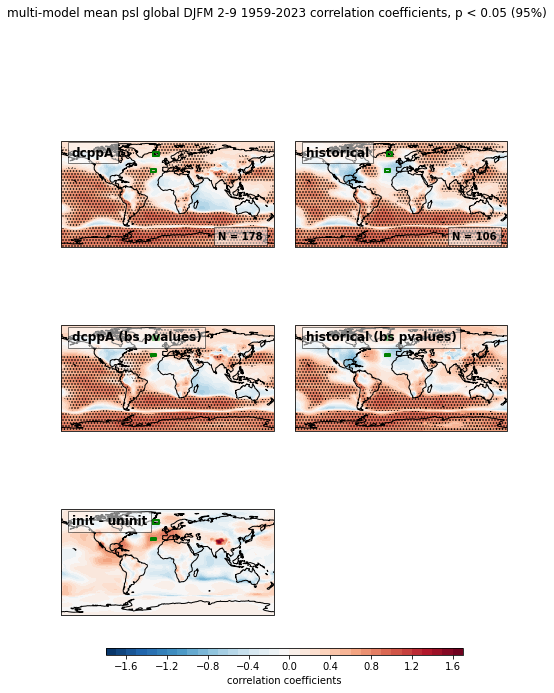

In [16]:
# Just as a test, plot the correlation coefficients for each of the uninit vs init as subplots
# TODO: plot the subplots for correlation differences
# TODO: Add a subplot to this which shows the difference between the two
plt_fnc.plot_correlations_init_vs_uninit(obs, dcpp_data, historical_data, 
                                            dcpp_models, historical_models, variable,
                                                region, season, forecast_range, dic.plots_dir,
                                                    dic.azores_grid, dic.iceland_grid, dic.uk_n_box, 
                                                        dic.uk_s_box)


In [17]:
# TODO: plot the mult-model differences in spatial correlations
# BUG: Figure out where the holes are coming from in the data
plt_fnc.plot_correlations(dic.models, rfield_diff, sign_regions, obs, variable,
                            region, season, forecast_range, dic.plots_dir,
                                obs_lons_converted, lons_converted, dic.azores_grid,
                                    dic.iceland_grid, dic.uk_n_box, dic.uk_s_box, experiment='differences',
                                        observed_data=observed_data, ensemble_members_count=None)

NameError: name 'rfield_diff' is not defined

In [ ]:
# TODO: plot the spatial correlation differences for each model
